In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': '한글'}>

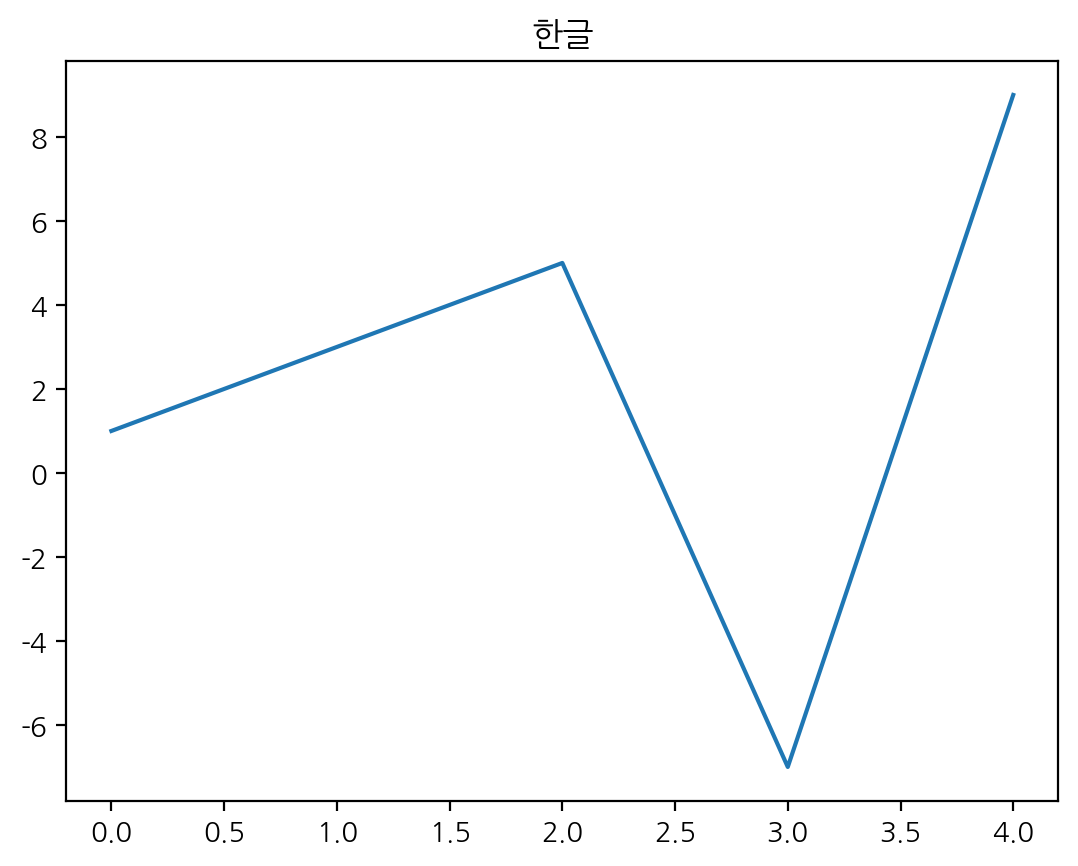

In [5]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [10]:
import os
import platform

dataset_path = "/home/gyuha_lee/NLP_24-2/27NOV24/dataset"

'''
코랩 기준 아래 코드 입력해서 런타임으로 csv 파일을 넣어지도록 합니다...
file_name = "dacon-klue-open-zip"

def file_exist_check(base_path):
    if os.path.exists(f"{base_path}train_data.csv"):
        print(f"{os.getcwd()}/{base_path} 경로에 파일이 있음")
        return
    
    if not os.path.exists(base_path):
        os.makedirs(base_path)

    if platform.system() == "Linux":
        print(f"파일을 다운로드 하고 {base_path} 경로에 압축을 해제함")
        !wget https://bit.ly/{file_name}
        !unzip {file_name} -d {base_path}
        return
    else:
        print(f"""https://dacon.io/competitions/official/235747/data에서 다운 받으시고 경로에 맞춰서 넣어주세요""")
        return
'''


'\n코랩 기준 아래 코드 입력해서 런타임으로 csv 파일을 넣어지도록 합니다...\nfile_name = "dacon-klue-open-zip"\n\ndef file_exist_check(base_path):\n    if os.path.exists(f"{base_path}train_data.csv"):\n        print(f"{os.getcwd()}/{base_path} 경로에 파일이 있음")\n        return\n    \n    if not os.path.exists(base_path):\n        os.makedirs(base_path)\n\n    if platform.system() == "Linux":\n        print(f"파일을 다운로드 하고 {base_path} 경로에 압축을 해제함")\n        !wget https://bit.ly/{file_name}\n        !unzip {file_name} -d {base_path}\n        return\n    else:\n        print(f"""https://dacon.io/competitions/official/235747/data에서 다운 받으시고 경로에 맞춰서 넣어주세요""")\n        return\n'

In [ ]:
train = pd.read_csv(os.path.join(dataset_path, "train_data.csv"))
test = pd.read_csv(os.path.join(dataset_path, "test_data.csv"))

train.shape, test.shape
# 학습, 예측 데이터셋을 불러온다

((45654, 3), (9131, 2))

In [ ]:
topic = pd.read_csv(os.path.join(dataset_path, "topic_dict.csv"))
topic
# 토픽을 불러온다.

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [ ]:
train.head()
# head() 함수와 values를 사용하여 데이터 확인

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [ ]:
test.head()
# head() 함수와 values를 사용하여 데이터 확인

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [ ]:
topic["topic"].values
# head() 함수와 values를 사용하여 데이터 확인

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

In [ ]:
raw = pd.concat([train, test])
raw.shape
# 데이터 병합

(54785, 3)

In [ ]:
raw.head()
# 병합내용 head 부분 확인

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [18]:
raw.tail()

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


In [ ]:
df = raw.merge(topic, how="left")
df.shape
# 토픽 병합

(54785, 4)

In [ ]:
df.head()
# 병합내용 head 부분 확인

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


In [ ]:
df["topic_idx"].value_counts()
# test는 결측치로 되어 있기 때문에 빈도수에 포함되지 않는다.
# 결측치: 수집된 데이터 셋 중 관측되지 않은 특정 확률변수의 값

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='topic'>

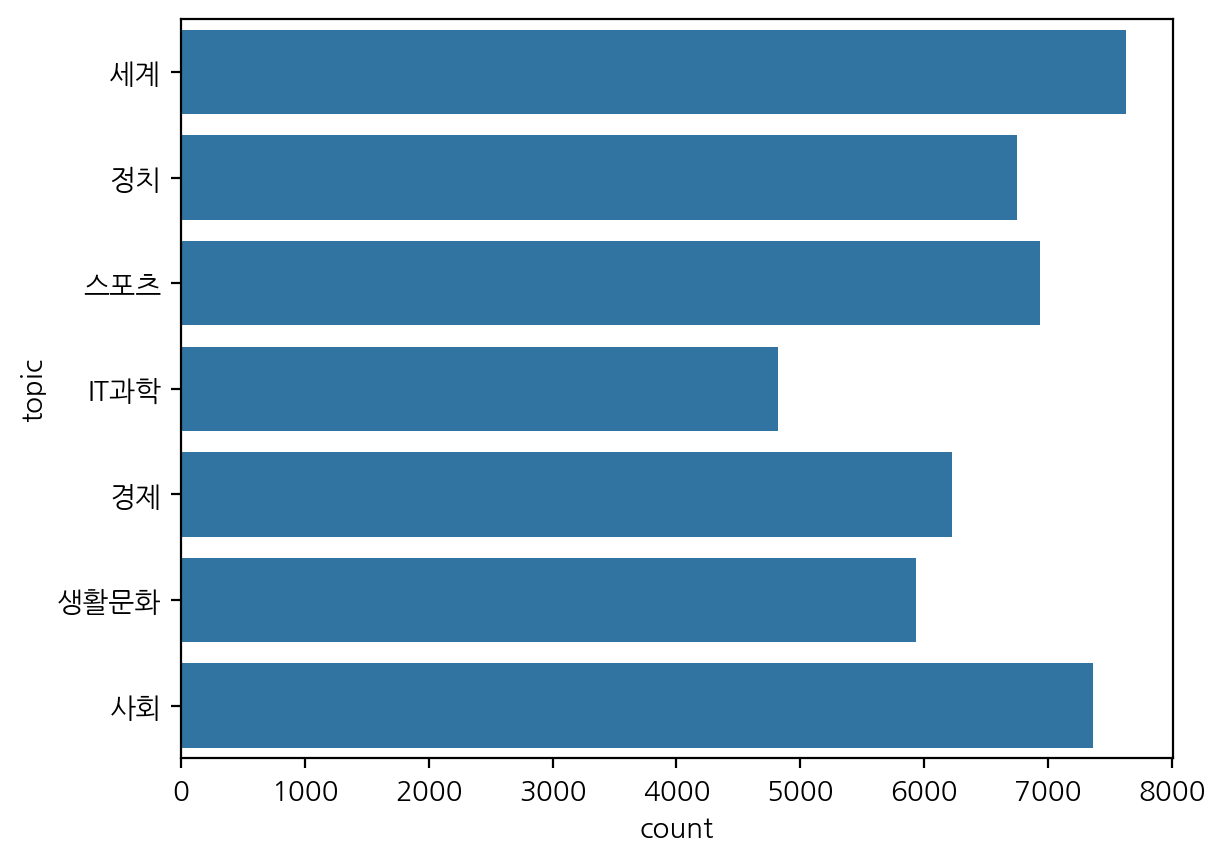

In [23]:
sns.countplot(data=df, y = "topic")
# 정답값 빈도수 -> df 로 빈도수 구할 수 있다

In [29]:
df["len"] = df["title"].apply(lambda x : len(x))
df["word_count"] = df["title"].apply(lambda x : len(x.split()))
df["unique_word_count"] = df["title"].apply(lambda x : len(set(x.split())))
# 문자 길이, 단어 빈도, 유일 어절의 빈도수를 알기 위한 파생 변수 만들기

In [30]:
df.head()
# 파생변수가 잘 만들어졌는지 확인.

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


<Axes: xlabel='unique_word_count', ylabel='Count'>

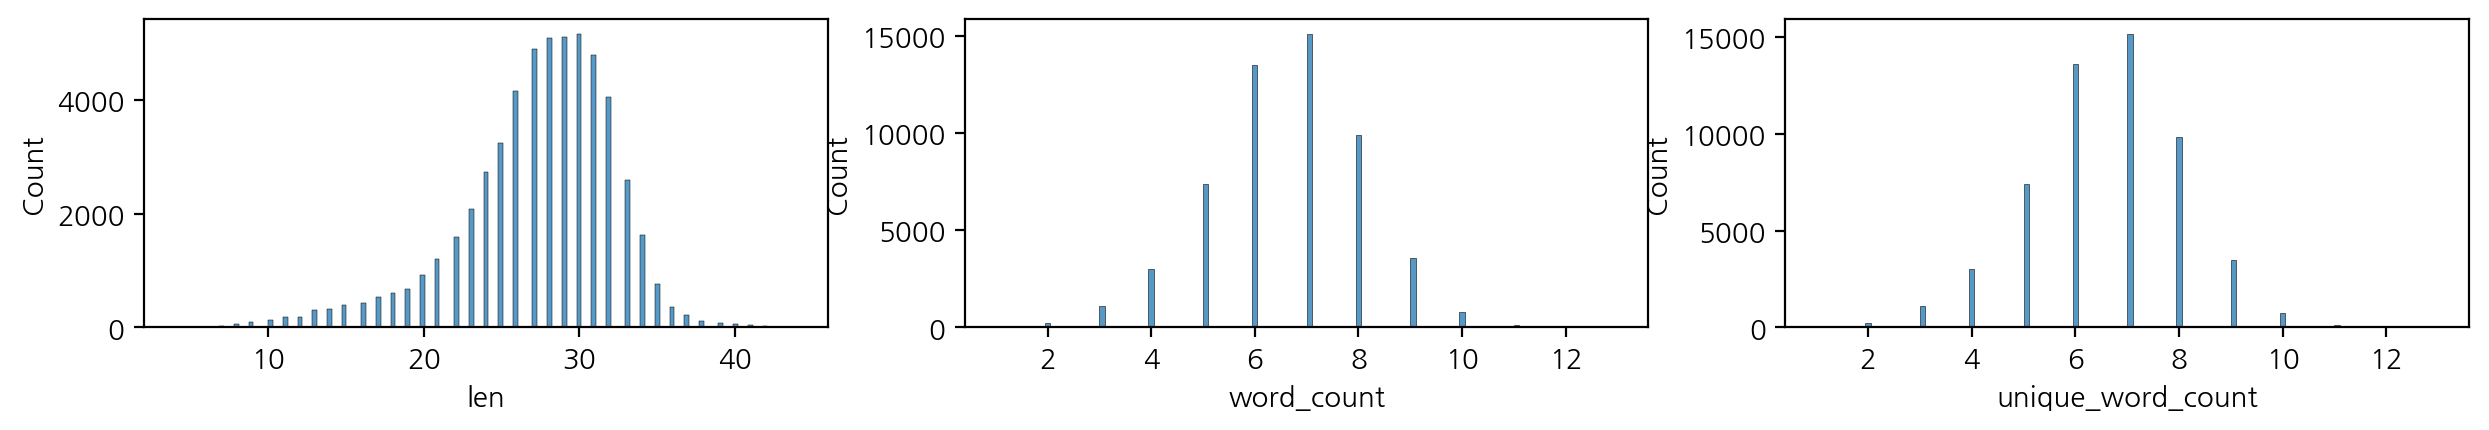

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (15, 2))
sns.histplot(df["len"], ax=axes[0])
sns.histplot(df["word_count"], ax=axes[1])
sns.histplot(df["unique_word_count"], ax=axes[2])
# 히스토그램 시각화 -> 문자 길이, 단어 빈도, 유일 어절의 빈도수를 알기 위한 파생 변수 만들기

In [ ]:
df[["len", "word_count", "unique_word_count"]].describe()
# 데이터 프레임의 통계치 확인

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


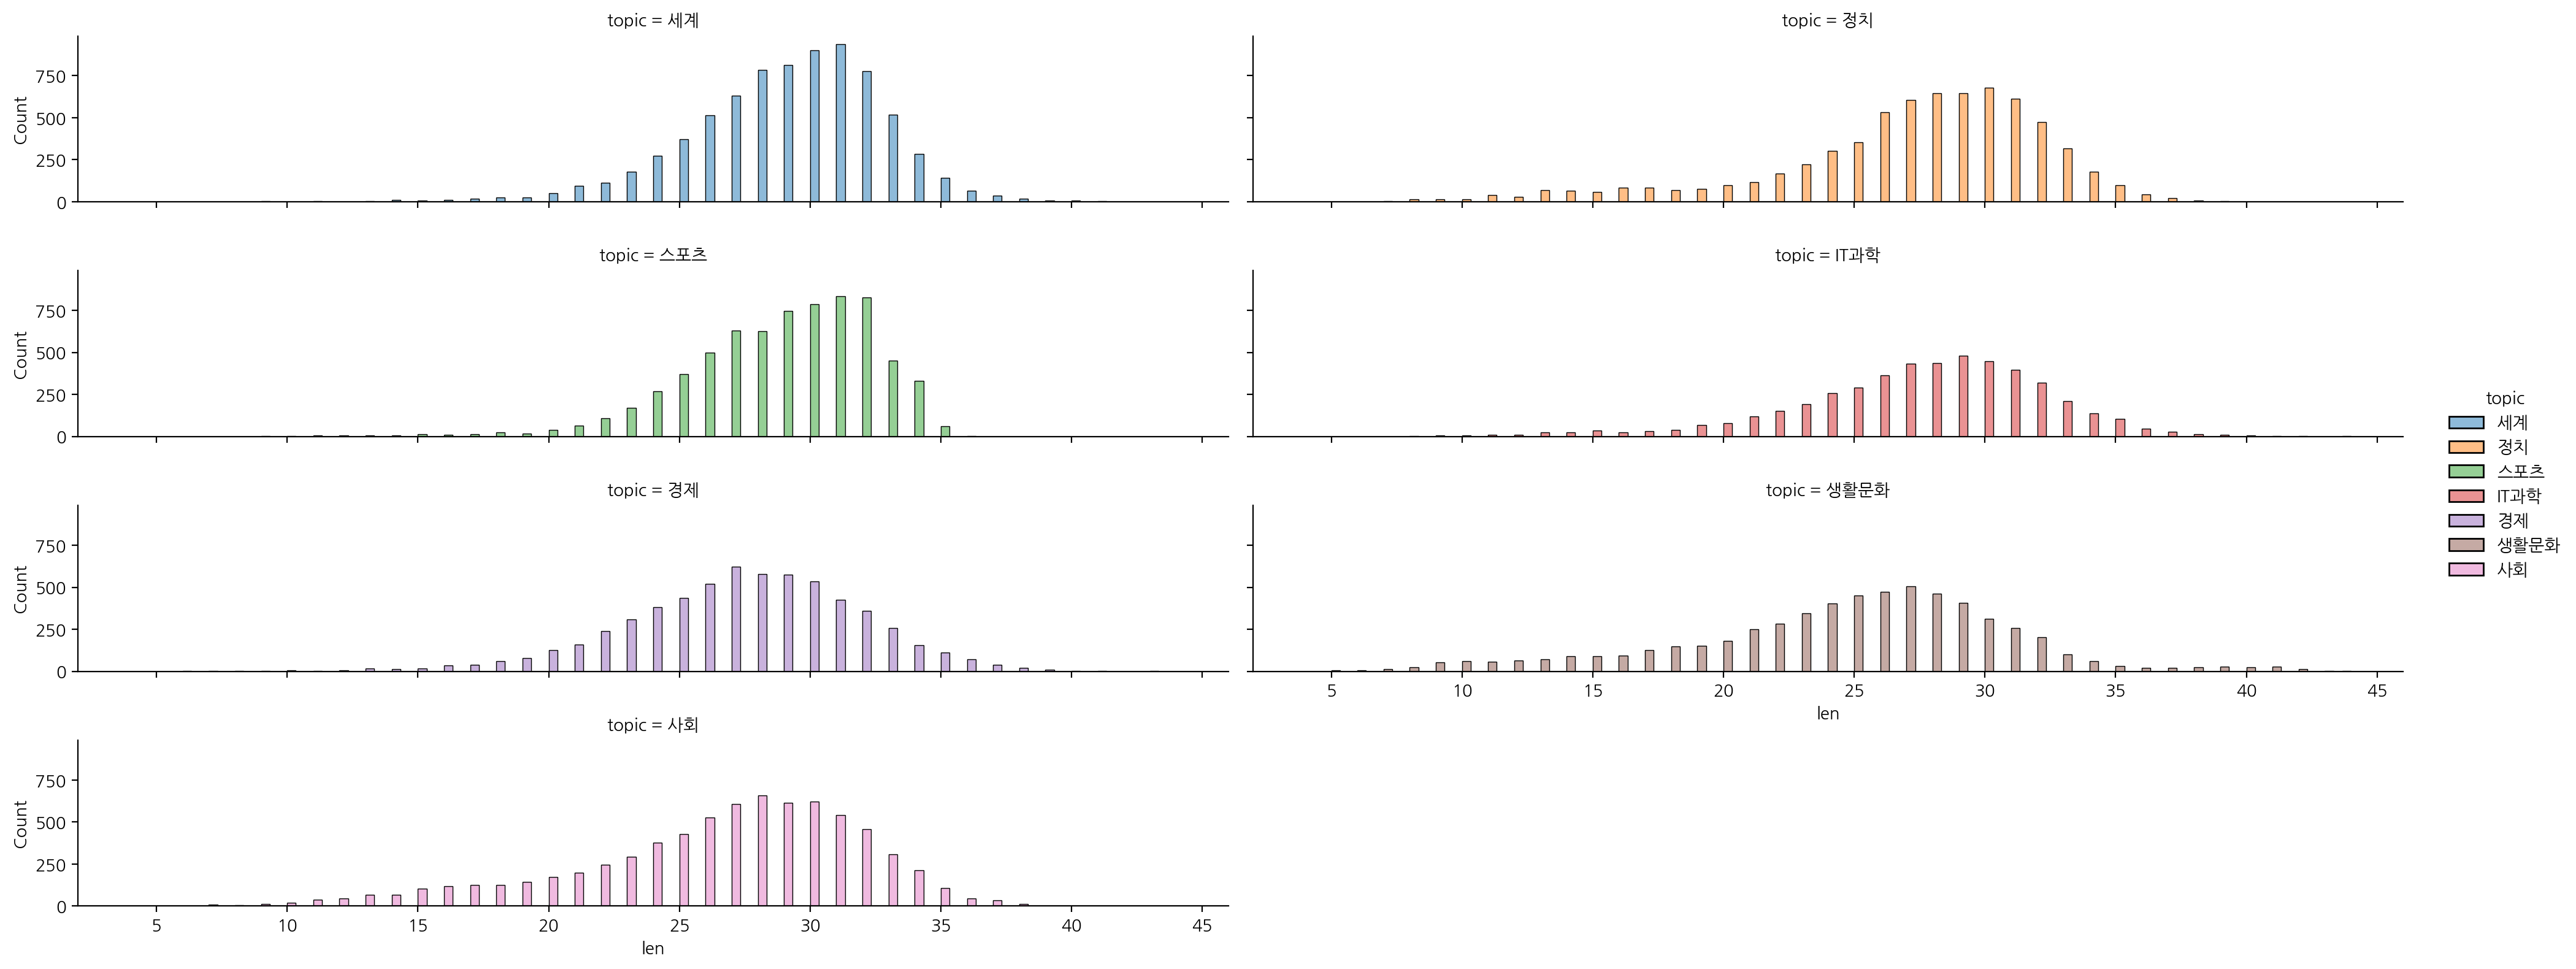

In [ ]:
sns.displot(data=df, x="len", hue="topic", col="topic", col_wrap=2, aspect=5, height=2)
# 주제별 글자와 단어 수 확인 -> 낱글자의 길이(len) 빈도

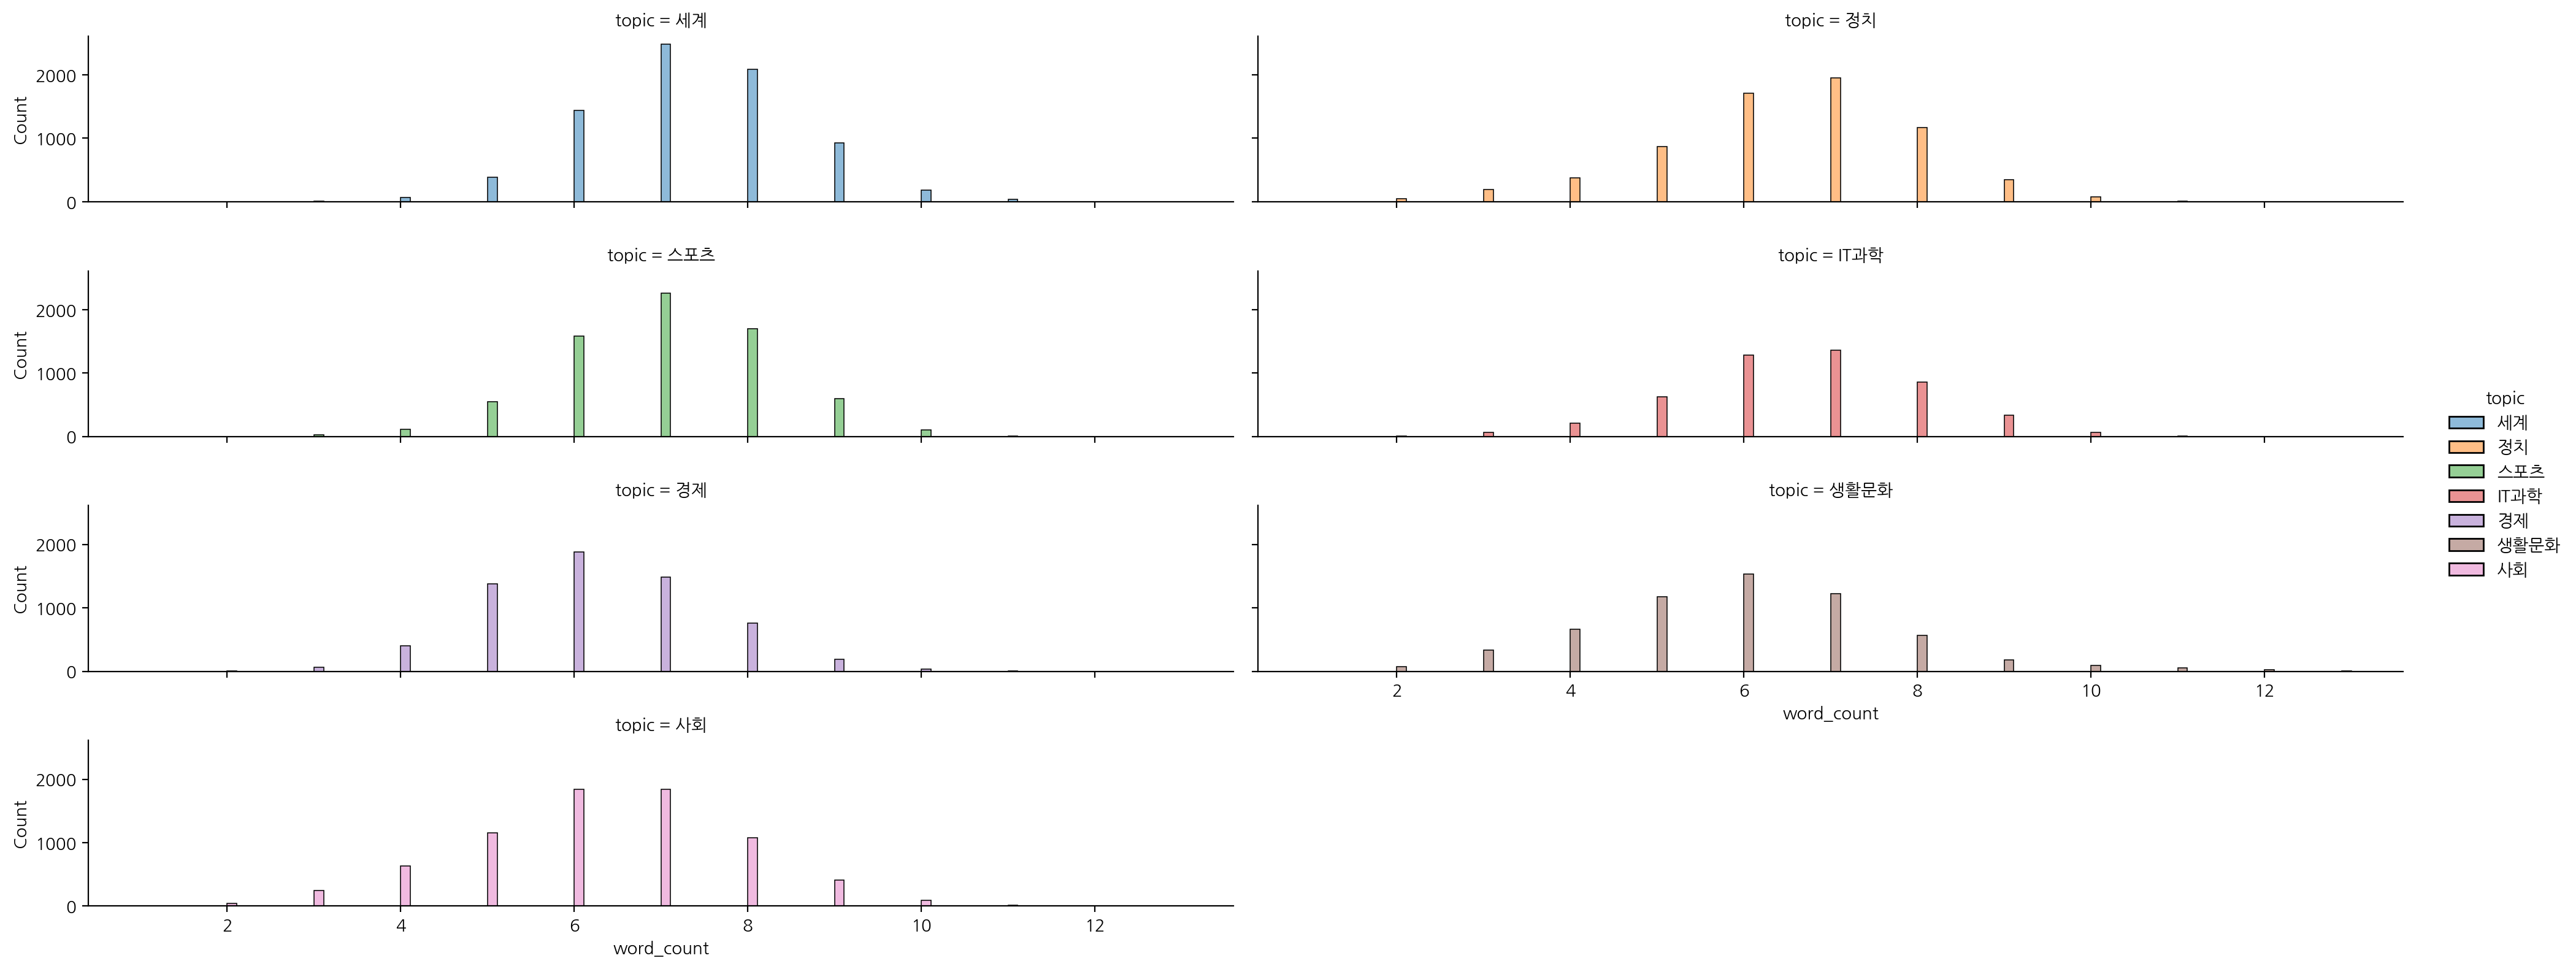

In [35]:
sns.displot(data=df, x="word_count", hue="topic", col="topic", col_wrap=2, aspect=5, height=2)
# 주제별 글자와 단어 수 확인 -> 단어 빈도

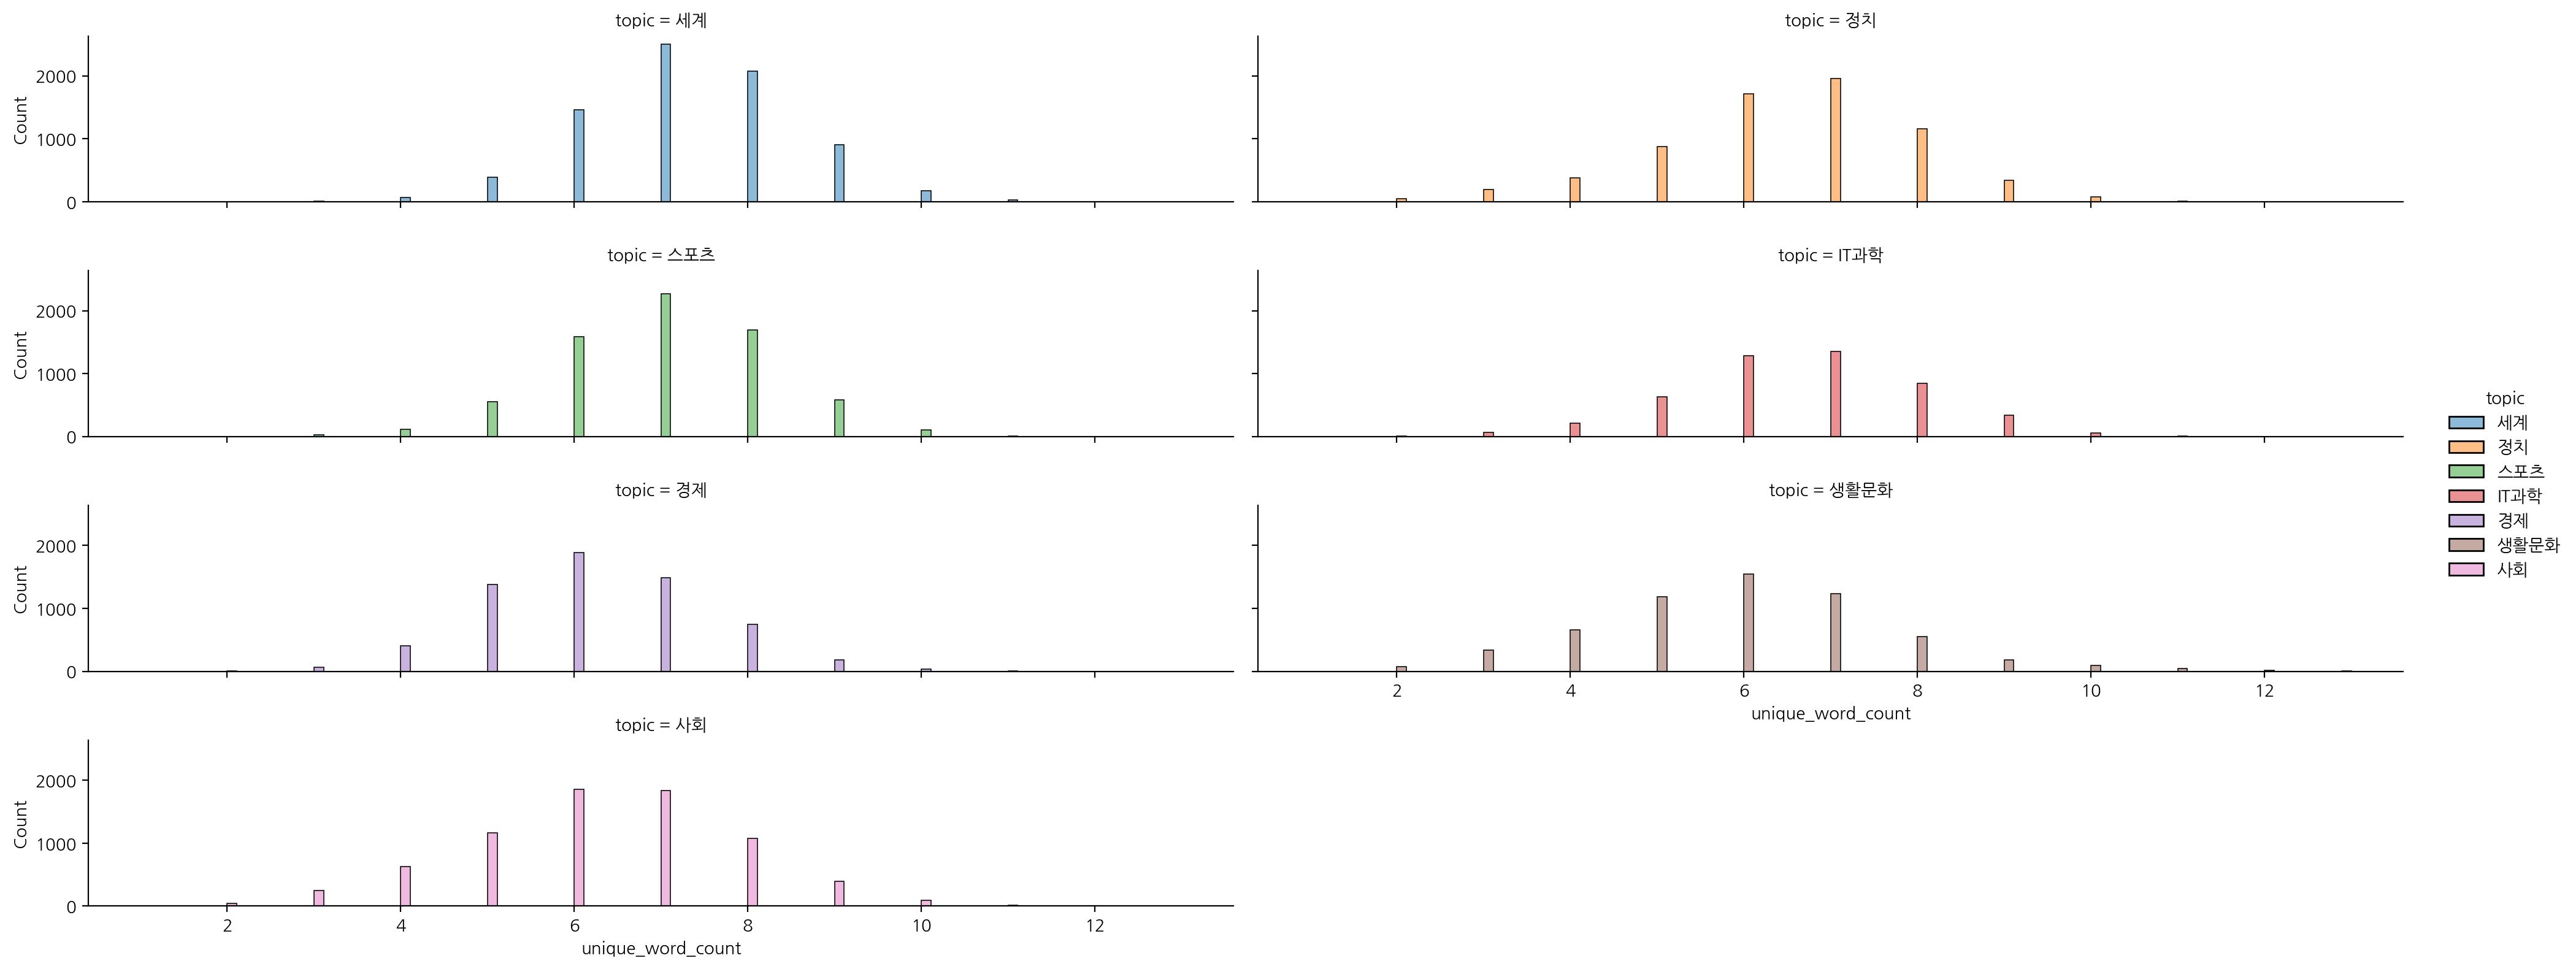

In [36]:
sns.displot(data=df, x="unique_word_count", hue="topic", col="topic", col_wrap=2, aspect=5, height=2)
# 주제별 글자와 단어 수 확인 -> 유일 어절 빈도

In [ ]:
# 문자 전처리

import re

df["title"] = df["title"].str.replace("[0-9]", "", regex=True)
# 숫자 제거

In [38]:
df["title"] = df["title"].str.lower()
# 영문자는 모두 소문자로 변경 
# 대소문자가 섞여 있으면 다른 다른 단어로 다루기 때문에 영문자는 모두 대문자 혹은 소문자로 변경


In [ ]:
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['합니다', '하는', '할', '하고', '한다', '그리고', '입니다', '그 ', ' 등', '이런', ' 것 ', ' 및 ', ' 제 ', ' 더 ']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

df["title"] = df["title"].map(remove_stopwords)
#불용어 제거